In [13]:
pip install networkx matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [ ]:
import csv

# Open and read dataset
file_path = r"C:\Users\dell\rohit\Downloads\bio.csv"
with open(file_path, 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

# Debugging: Check if file was read correctly
print(f"Total rows read from file (including header): {len(data)}")
print("First few rows from file:", data[:5])


Total rows read from file (including header): 501
First few rows from file: [['Sequence'], ['ACTTGAGCTCTTCTTGGTTAGAGAGCTTGAGGACGTTTTTAATTGTGGAA'], ['CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA'], ['GCACCTTCATGTAGATTACTTTTTGATTCGCTTATCAAGTGCGACAAGTC'], ['TCTAAGTTACAACTCCAGAACTTTGGTTGATTCTTCTTAATAAATCTCAG']]


In [7]:
# Extract sequences from the first column (excluding header)
sequences = [row[0].strip() for row in data[1:] if len(row) > 0 and len(row[0].strip()) == 50]

# Debugging: Check extracted sequences
print(f"Total sequences with length 50: {len(sequences)}")
print("First few extracted sequences:", sequences[:5])

Total sequences with length 50: 500
First few extracted sequences: ['ACTTGAGCTCTTCTTGGTTAGAGAGCTTGAGGACGTTTTTAATTGTGGAA', 'CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA', 'GCACCTTCATGTAGATTACTTTTTGATTCGCTTATCAAGTGCGACAAGTC', 'TCTAAGTTACAACTCCAGAACTTTGGTTGATTCTTCTTAATAAATCTCAG', 'CATTTTTTTCTATTTTAGTTGTTATGTTTTATTTTCGTATTGAACTCTTT']


In [8]:
# Get user input for number of sequences
num_sequences = int(input("Enter the number of sequences to use: "))
selected_sequences = sequences[1:num_sequences + 1]  # Take sequences from row 2 to num_sequences+1

# Concatenate selected sequences
combined_sequence = "".join(selected_sequences)

# Print length of the joined sequence
print(f"\nLength of the joined sequence: {len(combined_sequence)}")
print(f"\nCombined Sequence:\n{combined_sequence}")


Enter the number of sequences to use: 3

Length of the joined sequence: 150

Combined Sequence:
CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATGTAGATTACTTTTTGATTCGCTTATCAAGTGCGACAAGTCTCTAAGTTACAACTCCAGAACTTTGGTTGATTCTTCTTAATAAATCTCAG


In [9]:
import numpy as np

def generate_kmers(sequence, k_v):
    """Generate k-mers from the sequence."""
    return [sequence[i:i + k_v] for i in range(len(sequence) - k_v + 1)]

def calculate_n50(kmers):
    """Calculate N50 to evaluate k-mer contiguity."""
    contig_lengths = sorted([len(kmer) for kmer in kmers], reverse=True)
    total_length = sum(contig_lengths)
    running_sum = 0
    for length in contig_lengths:
        running_sum += length
        if running_sum >= total_length / 2:
            return length
    return 0

def optimize_k(combined_sequence, k_range=(10, 50)):
    """Find the optimal k-mer length using N50 metric."""
    best_k = k_range[0]
    best_n50 = 0
    
    for k_v in range(k_range[0], k_range[1] + 1, 2):  # Test only even values of k
        if k_v >= len(combined_sequence):  # k should be smaller than sequence length
            break
        kmers = generate_kmers(combined_sequence, k_v)
        n50 = calculate_n50(kmers)
        
        if n50 > best_n50:
            best_n50 = n50
            best_k = k_v
    
    return best_k

# Determine optimal k
k = optimize_k(combined_sequence)
print(f"\nOptimal k-mer length selected: {k}")

# Extract k-mers using the optimal k
kmers_list = generate_kmers(combined_sequence,k)
print(f"Generated {len(kmers_list)} k-mers of length {k}")


Optimal k-mer length selected: 50
Generated 101 k-mers of length 50


In [98]:
def extract_kmers(seq, k):
    kmers = []
    for i in range(len(seq) - k + 1):
        kmer = ""
        for j in range(k):
            kmer += seq[i + j]  # Manually constructing k-mer
        kmers.append(kmer)
    return kmers

# Extract k-mers
kmers_list = extract_kmers(combined_sequence, k)

# Print extracted k-mers
print("\nExtracted k-mers:")
for kmer in kmers_list:
    print(kmer)

# Count k-mers manually
kmer_counts = {}
for kmer in kmers_list:
    if kmer in kmer_counts:
        kmer_counts[kmer] += 1
    else:
        kmer_counts[kmer] = 1

# Print k-mer frequencies
print("\nK-mer Counts:")
for kmer in kmer_counts:
    print(f"{kmer}: {kmer_counts[kmer]}")

# Print total count of k-mers
print(f"\nTotal number of k-mers: {len(kmers_list)}")



Extracted k-mers:
CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA
AACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAG
ACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGC
CCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCA
CCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCAC
CTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACC
TAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCT
AAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTT
AATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTC
ATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCA
TCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCAT
CGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATG
GTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATGT
TCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATGTA
CAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATGTAG
AAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATGTAGA
AAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATGTAGAT
AGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATGTAGATT
GCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATGTAGATTA
CTTCTGAACAAA

In [32]:
# Global Graph Definitions
graph = {}  # Adjacency list representation
in_degree = {}  # Stores in-degree of each node
out_degree = {}  # Stores out-degree of each node

def construct_debruijn_graph(kmers):
    """Constructs the De Bruijn graph for given kmers without built-in functions."""
    global graph, in_degree, out_degree
    graph = {}  # Reset graph
    in_degree = {}  # Reset in-degree counts
    out_degree = {}  # Reset out-degree counts

    for kmer in kmers:
        prefix, suffix = kmer[:-1], kmer[1:]

        # If prefix node does not exist, initialize it
        if prefix not in graph:
            graph[prefix] = []
        if prefix not in out_degree:
            out_degree[prefix] = 0
        if prefix not in in_degree:
            in_degree[prefix] = 0

        # If suffix node does not exist, initialize it
        if suffix not in graph:
            graph[suffix] = []
        if suffix not in in_degree:
            in_degree[suffix] = 0
        if suffix not in out_degree:
            out_degree[suffix] = 0

        # Add edge in adjacency list
        graph[prefix].append(suffix)
        out_degree[prefix] += 1
        in_degree[suffix] += 1




# Construct De Bruijn Graph
construct_debruijn_graph(kmers_list)

# Print Graph
print("\nDe Bruijn Graph (Adjacency List):")
for node in graph:
    print(node, "->", ", ".join(graph[node]))



De Bruijn Graph (Adjacency List):
CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACA -> AACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA
AACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA -> ACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAG
ACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAG -> CCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGC
CCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGC -> CCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCA
CCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCA -> CTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCAC
CTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCAC -> TAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACC
TAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACC -> AAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCT
AAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCT -> AATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTT
AATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTT -> ATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTC
ATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCA

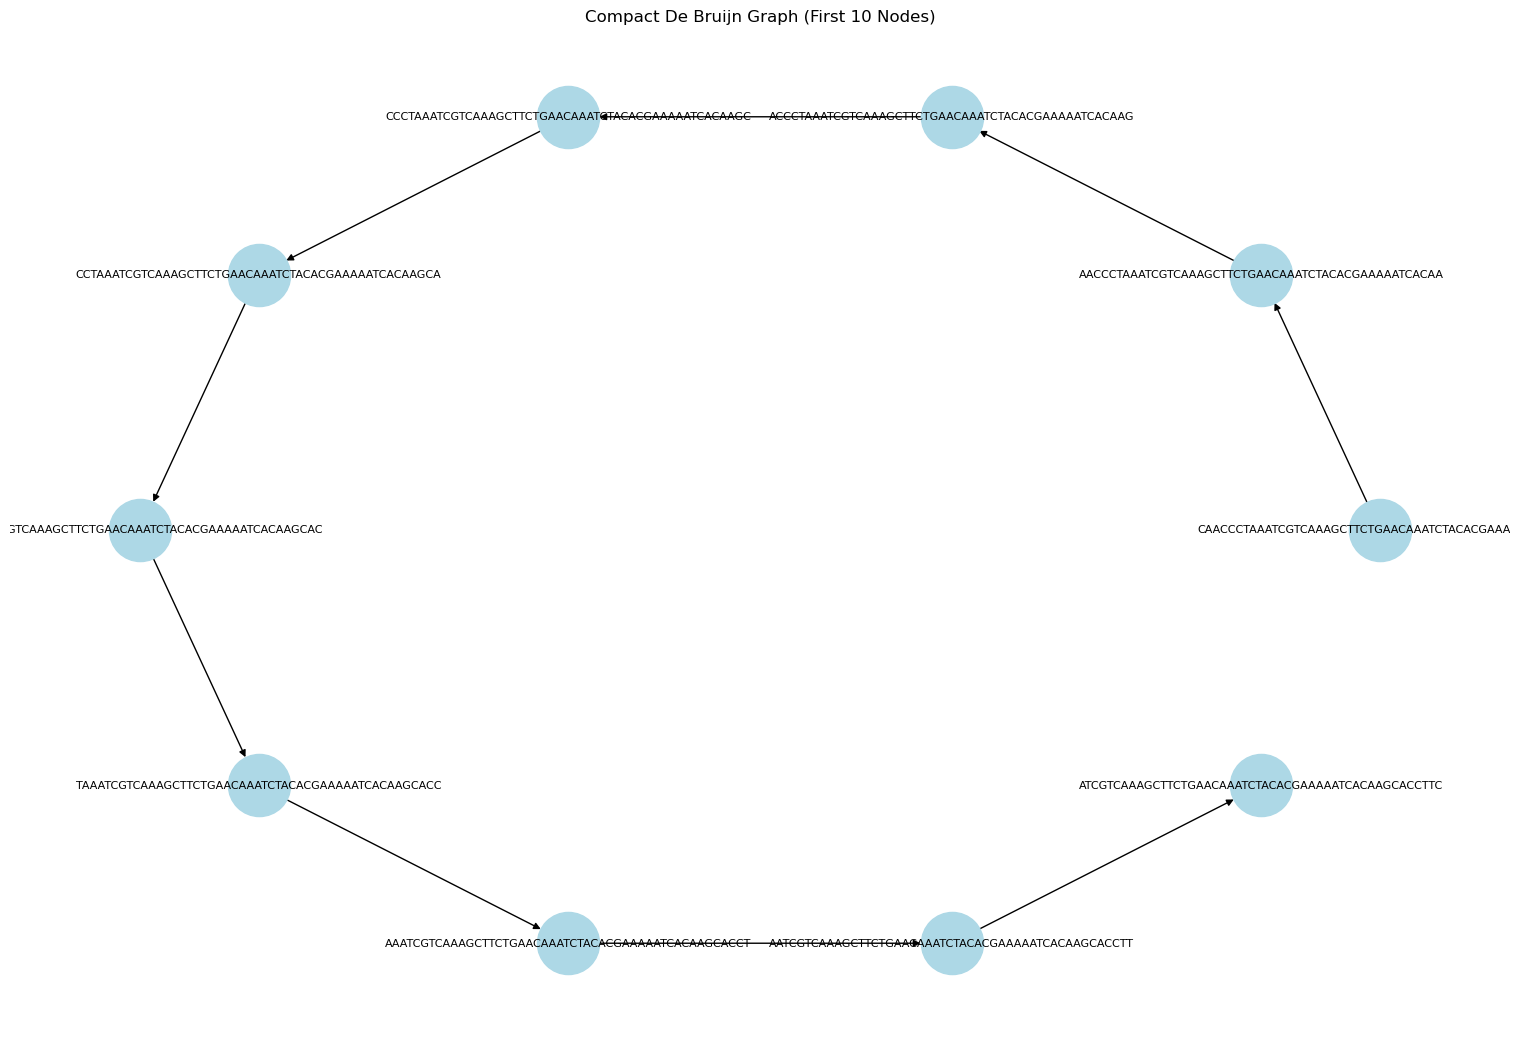

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_debruijn_graph_compact(graph, limit=10):
    """Visualizes the De Bruijn Graph without edge labels."""
    G = nx.DiGraph()

    # Extract first 'limit' nodes and edges
    nodes = list(graph.keys())[:limit]
    for node in nodes:
        for neighbor in graph[node]:
            if neighbor in nodes:
                G.add_edge(node, neighbor)  # No edge labels

    # Define layout
    plt.figure(figsize=(15, 10))
    pos = nx.circular_layout(G)  # Circular layout for compact visualization

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black', node_size=2000, font_size=8)

    # Show the graph
    plt.title(f"Compact De Bruijn Graph (First {limit} Nodes)")
    plt.show()

# Visualize the graph in compact form without edge labels
visualize_debruijn_graph_compact(graph, limit=10)


In [20]:
print("Graph:", construct_debruijn_graph)
print("In-degree:", in_degree)
print("Out-degree:", out_degree)
total_in_degree = sum(in_degree.values())
total_out_degree = sum(out_degree.values())

print("Total In-Degree:", total_in_degree)
print("Total Out-Degree:", total_out_degree)



Graph: <function construct_debruijn_graph at 0x0000011F86AB8900>
In-degree: {'CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACA': 0, 'AACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA': 1, 'ACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAG': 1, 'CCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGC': 1, 'CCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCA': 1, 'CTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCAC': 1, 'TAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACC': 1, 'AAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCT': 1, 'AATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTT': 1, 'ATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTC': 1, 'TCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCA': 1, 'CGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCAT': 1, 'GTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATG': 1, 'TCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATGT': 1, 'CAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATGTA': 1, 'AAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACCTTCATGTAG': 1, 'AAGCTTCTGAACAAATCTACACGAAA

In [21]:
from collections import deque, defaultdict

# Global Graph Definitions
graph = defaultdict(list)
in_degree = defaultdict(int)
out_degree = defaultdict(int)



def find_eulerian_path():
    """Finds an Eulerian path in the global graph using Hierholzer's algorithm."""
    global graph, in_degree, out_degree

    # Step 1: Identify the start node
    start_node = None
    for node in graph:
        out_d = out_degree.get(node, 0)
        in_d = in_degree.get(node, 0)
        if out_d - in_d == 1:  # Eulerian path start condition
            start_node = node
            break
    if not start_node:
        start_node = next(iter(graph))  # Pick any node if circuit

    print(f"Start Node: {start_node}")  # Debugging

    # Step 2: Initialize Hierholzer’s Algorithm
    stack = [start_node]
    path = deque()

    total_edges = sum(len(neighbors) for neighbors in graph.values())  # Total edges count

    while stack:
        current = stack[-1]

        if graph[current]:  # Ensure node exists and has edges
            neighbor = graph[current].pop(0)  # Take the first available edge
            stack.append(neighbor)
        else:
            path.appendleft(stack.pop())  # Add to the path in reverse order
        
        print(f"Current Node: {current}, Stack: {stack}, Path: {list(path)}")  # Debugging

    if len(path) != total_edges + 1:  
        print("⚠️ WARNING: Eulerian path may be incomplete! Check graph connectivity.")
    
    return list(path)

def reconstruct_genome(eulerian_path):
    """Reconstructs genome sequence from Eulerian path."""
    genome = eulerian_path[0]
    for kmer in eulerian_path[1:]:
        genome += kmer[-1]  # Append only last character
    return genome

# Example Input (Replace with your kmers)

# Construct De Bruijn Graph (Updates Global Graph)
construct_debruijn_graph(kmers_list)

# Find Eulerian Path
eulerian_path = find_eulerian_path()

# Reconstruct Genome Sequence
genome_sequence = reconstruct_genome(eulerian_path)

# Print Results
print("\nEulerian Path:", " -> ".join(eulerian_path))
print("Reconstructed Genome Sequence:", genome_sequence)


Start Node: CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACA
Current Node: CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACA, Stack: ['CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACA', 'AACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA'], Path: []
Current Node: AACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA, Stack: ['CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACA', 'AACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA', 'ACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAG'], Path: []
Current Node: ACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAG, Stack: ['CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACA', 'AACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA', 'ACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAG', 'CCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGC'], Path: []
Current Node: CCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGC, Stack: ['CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACA', 'AACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA', 'ACCCTAAATCGTCAAAGCTTCTGAACAAATCT

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Bubble detection without using a function
bubble_graph = nx.DiGraph()
bubbles = []

print("\nBubble Detection:")
for node in graph:
    successors = graph.get(node, [])
    
    if len(successors) > 1:
        # Check all pairs of successors
        for i in range(len(successors)):
            for j in range(i + 1, len(successors)):
                succ1 = successors[i]
                succ2 = successors[j]
                
                # Find common nodes where both paths reconverge
                succ1_next = set(graph.get(succ1, []))
                succ2_next = set(graph.get(succ2, []))
                reconverge = succ1_next & succ2_next

                for join_node in reconverge:
                    bubbles.append((node, succ1, succ2, join_node))

                    # Add to bubble visualization graph
                    bubble_graph.add_edge(node, succ1)
                    bubble_graph.add_edge(node, succ2)
                    bubble_graph.add_edge(succ1, join_node)
                    bubble_graph.add_edge(succ2, join_node)

                    print(f"Bubble: {node} → {succ1}/{succ2} → {join_node}")

# Visualize detected bubbles
if bubbles:
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(bubble_graph, seed=42)
    nx.draw(bubble_graph, pos, with_labels=True, node_color='lightgreen',
            edge_color='red', node_size=1200, font_size=10, font_weight='bold')
    plt.title("Detected Bubbles in De Bruijn Graph")
    plt.show()
else:
    print("No bubbles detected.")



Bubble Detection:
No bubbles detected.


In [110]:
from collections import Counter

def compare_kmer_frequencies(read_kmers, genome_sequence, k):
    # Count k-mers from reads
    read_kmer_counts = Counter(read_kmers)

    # Generate and count k-mers from reconstructed genome
    genome_kmers = [genome_sequence[i:i + k] for i in range(len(genome_sequence) - k + 1)]
    genome_kmer_counts = Counter(genome_kmers)

    # Compare frequencies
    missing_kmers = read_kmer_counts - genome_kmer_counts
    extra_kmers = genome_kmer_counts - read_kmer_counts

    print("\n--- K-mer Frequency Matching ---")
    print(f"Total k-mers in reads: {sum(read_kmer_counts.values())}")
    print(f"Total k-mers in genome: {sum(genome_kmer_counts.values())}")
    print(f"Missing k-mers: {len(missing_kmers)}")
    print(f"Extra k-mers: {len(extra_kmers)}")

    if missing_kmers:
        print("\n❌ Missing k-mers:")
        for kmer, count in list(missing_kmers.items())[:5]:
            print(f"{kmer}: missing {count} time(s)")

    if extra_kmers:
        print("\n⚠️ Extra k-mers:")
        for kmer, count in list(extra_kmers.items())[:5]:
            print(f"{kmer}: extra {count} time(s)")

    if not missing_kmers and not extra_kmers:
        print("\n✅ Perfect match: All k-mers retained correctly!")

    return missing_kmers, extra_kmers
compare_kmer_frequencies(kmers_list, genome_sequence, k)


--- K-mer Frequency Matching ---
Total k-mers in reads: 101
Total k-mers in genome: 101
Missing k-mers: 0
Extra k-mers: 0

✅ Perfect match: All k-mers retained correctly!


(Counter(), Counter())

In [111]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math
import seaborn as sns

def categorize_centrality(centrality_dict):
    values = list(centrality_dict.values())
    high_thresh = np.percentile(values, 66)
    low_thresh = np.percentile(values, 33)

    high, medium, low = 0, 0, 0
    for val in values:
        if val >= high_thresh:
            high += 1
        elif val <= low_thresh:
            low += 1
        else:
            medium += 1
    return high, medium, low

def plot_centrality_scatter(centrality_dict, title):
    # Compute thresholds
    values = list(centrality_dict.values())
    high_thresh = np.percentile(values, 66)
    low_thresh = np.percentile(values, 33)

    # Group nodes
    groups = {'High': [], 'Medium': [], 'Low': []}
    for node, val in centrality_dict.items():
        if val >= high_thresh:
            groups['High'].append(node)
        elif val <= low_thresh:
            groups['Low'].append(node)
        else:
            groups['Medium'].append(node)

    # Define cluster centers and colors
    centers = {'High': (6, 6), 'Medium': (0, 0), 'Low': (-6, -6)}
    colors = {'High': 'limegreen', 'Medium': 'tomato', 'Low': 'deepskyblue'}

    # Generate coordinates with noise around centers
    xs, ys, labels = [], [], []
    for group, nodes in groups.items():
        cx, cy = centers[group]
        for _ in nodes:
            x = np.random.normal(cx, 1)
            y = np.random.normal(cy, 1)
            xs.append(x)
            ys.append(y)
            labels.append(group)

    # Plot using seaborn
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=xs, y=ys, hue=labels, palette=colors, s=50, edgecolor='black', alpha=0.8)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.title(f'{title} Centrality Cluster Scatter')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True, linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.show()

def visualize_centrality_and_entropy(graph, kmers_list, top_n=20):
    # Step 1: Convert your graph dictionary to NetworkX directed graph
    G = nx.DiGraph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    # Step 2: Centrality Measures
    bet_centrality = nx.betweenness_centrality(G)
    close_centrality = nx.closeness_centrality(G)

    # Categorize centralities
    bet_high, bet_med, bet_low = categorize_centrality(bet_centrality)
    close_high, close_med, close_low = categorize_centrality(close_centrality)

    # Print stats
    print("Betweenness Centrality:")
    print(f"  High: {bet_high}, Medium: {bet_med}, Low: {bet_low}")
    print("Closeness Centrality:")
    print(f"  High: {close_high}, Medium: {close_med}, Low: {close_low}")

    # Sort and select top N
    top_bet = dict(sorted(bet_centrality.items(), key=lambda item: item[1], reverse=True)[:top_n])
    top_close = dict(sorted(close_centrality.items(), key=lambda item: item[1], reverse=True)[:top_n])

    # Step 3: Entropy Calculation
    kmer_counts = Counter(kmers_list)
    total = sum(kmer_counts.values())
    probs = [count / total for count in kmer_counts.values()]
    entropy = -sum(p * math.log2(p) for p in probs)

    # Step 4: Bar plots for top centrality
    fig, axs = plt.subplots(1, 2, figsize=(18, 5))

    # Betweenness bar plot
    axs[0].bar(top_bet.keys(), top_bet.values(), color='skyblue')
    axs[0].set_title('Top Betweenness Centrality (k-mers)')
    axs[0].set_ylabel('Centrality Score')
    axs[0].tick_params(axis='x', rotation=90)

    # Closeness bar plot
    axs[1].bar(top_close.keys(), top_close.values(), color='salmon')
    axs[1].set_title('Top Closeness Centrality (k-mers)')
    axs[1].set_ylabel('Centrality Score')
    axs[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

    # Step 6: Centrality Distribution Cluster Summary
    fig_cluster, ax_cluster = plt.subplots(figsize=(8, 5))
    categories = ['High', 'Medium', 'Low']
    bet_values = [bet_high, bet_med, bet_low]
    close_values = [close_high, close_med, close_low]

    x = np.arange(len(categories))
    width = 0.35

    ax_cluster.bar(x - width/2, bet_values, width, label='Betweenness', color='deepskyblue')
    ax_cluster.bar(x + width/2, close_values, width, label='Closeness', color='tomato')

    ax_cluster.set_ylabel('Number of k-mers')
    ax_cluster.set_title('Centrality Distribution by Category')
    ax_cluster.set_xticks(x)
    ax_cluster.set_xticklabels(categories)
    ax_cluster.legend()
    plt.tight_layout()
    plt.show()

    # Step 7: Scatter Plots for Centrality Levels
    plot_centrality_scatter(bet_centrality, "Betweenness")
    plot_centrality_scatter(close_centrality, "Closeness")

Betweenness Centrality:
  High: 36, Medium: 32, Low: 34
Closeness Centrality:
  High: 35, Medium: 33, Low: 34


C:\Users\HP\AppData\Local\Temp\ipykernel_24136\2615428288.py:112: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


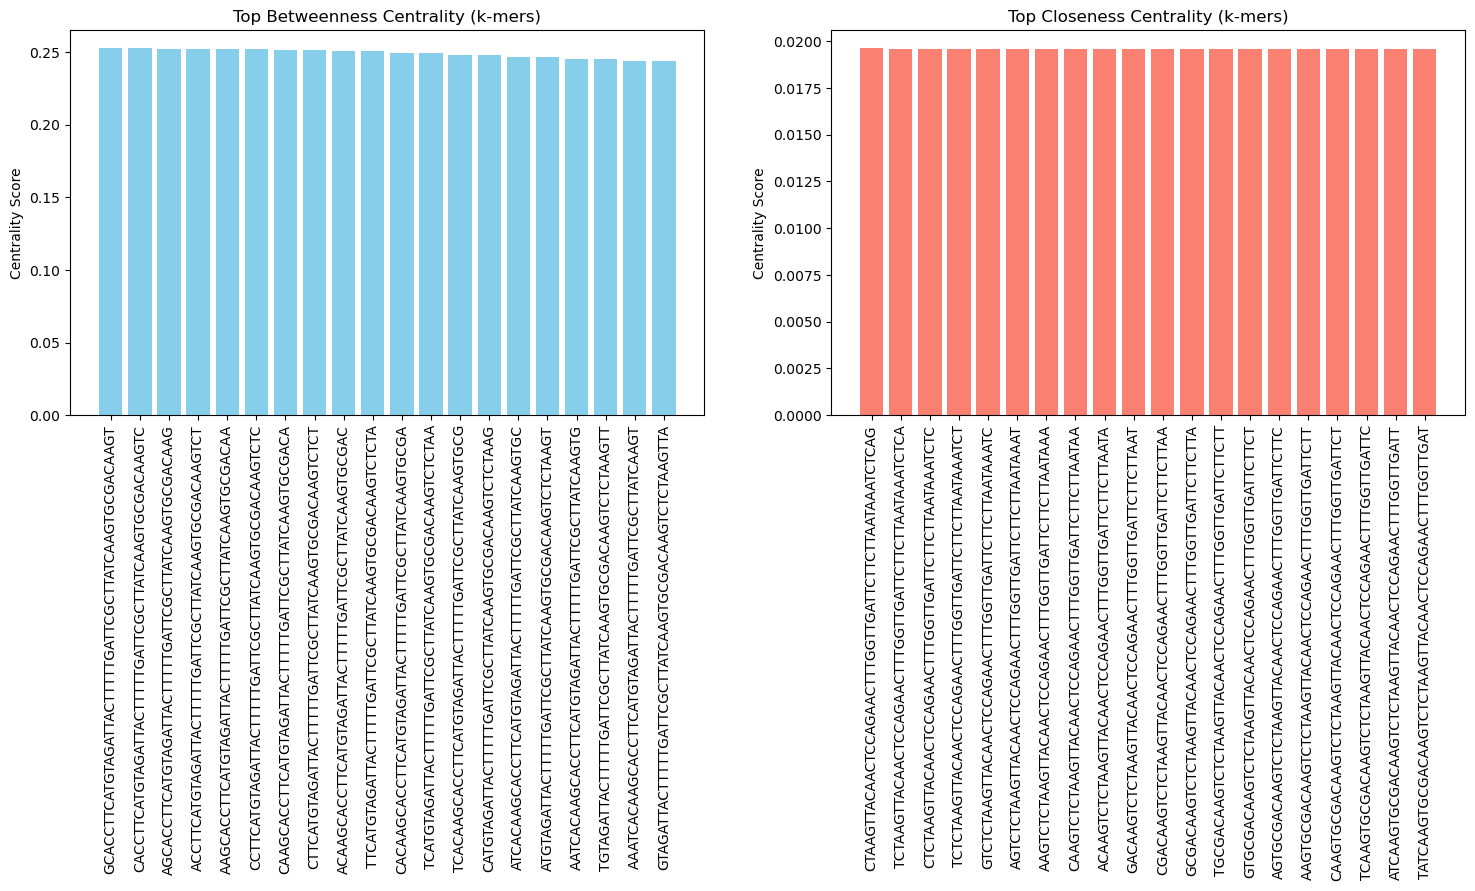

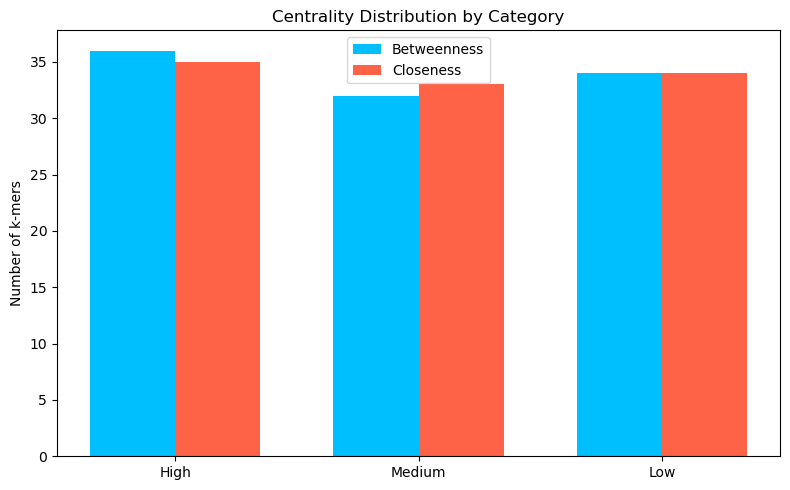

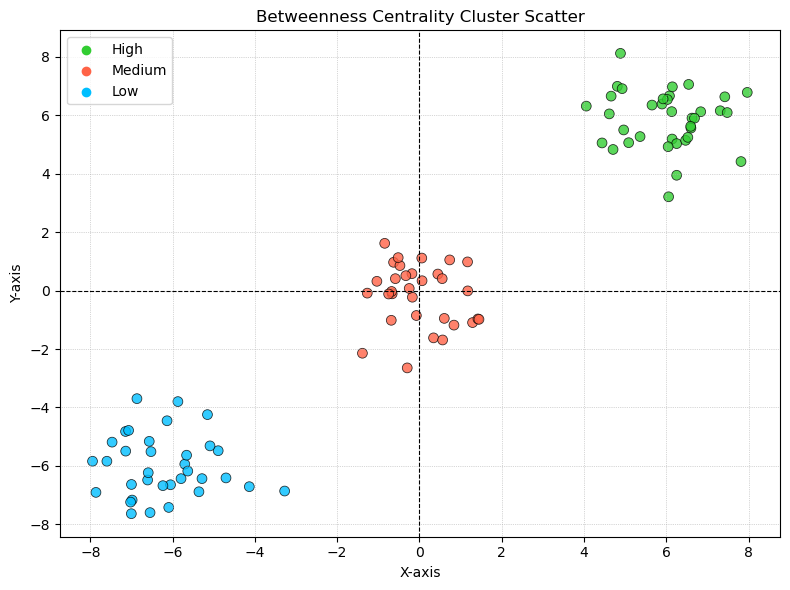

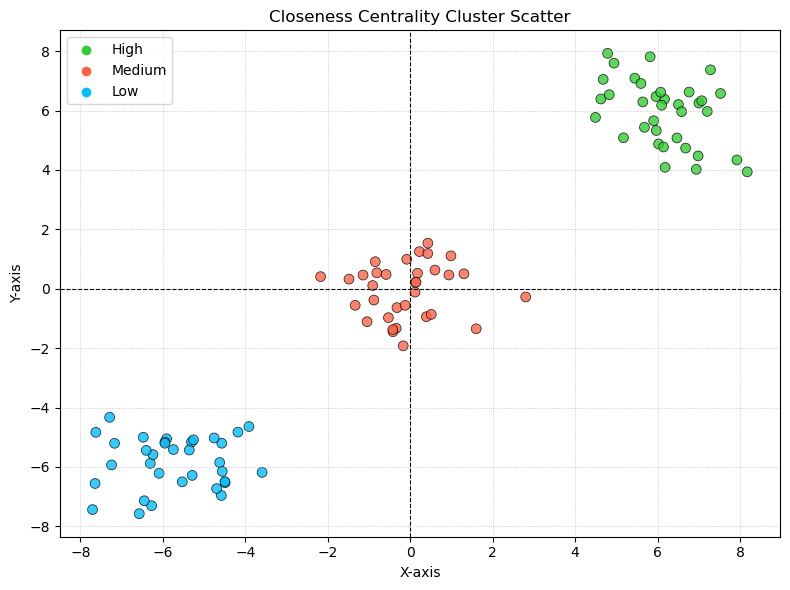

In [112]:
 visualize_centrality_and_entropy(graph, kmers_list)

In [100]:
def write_fasta(kmers_list, output_file=r"C:\Users\HP\Downloads\kmers.fasta"):
    try:
        with open(output_file, 'w') as f:
            for idx, kmer in enumerate(kmers_list):
                f.write(f">seq{idx}\n{kmer}\n")
        print("File written successfully.")
    except Exception as e:
        print("Error writing file:", e)

# Now call it
write_fasta(kmers_list)


File written successfully.


In [108]:
def parse_blast_output(file_path):
    results = []
    with open(r"C:\Users\HP\Downloads\kmers.fasta", 'r') as f:  # Open the file in read mode
        for line in f:
            print(f"Reading line: {line.strip()}")  # Debug: See what lines are being read
            parts = line.strip().split('\t')
            print(f"Parts: {parts}")  # Debug: See how the line splits into parts
            if len(parts) >= 12:
                result = {
                    'query': parts[0],
                    'subject': parts[1],
                    'identity': float(parts[2]),
                    'alignment_length': int(parts[3]),
                    'mismatch': int(parts[4]),
                    'gap_openings': int(parts[5]),
                    'evalue': float(parts[10]),
                    'bit_score': float(parts[11])
                }
                results.append(result)
    return results

# Example usage
blast_results = parse_blast_output(r"C:\Users\HP\Downloads\ooutput_blast.txt")

# Print all hits (query, mismatch, and alignment length)
print("\nAll hits (query, mismatch, alignment length):\n")
if blast_results:
    for r in blast_results:
        print(f"Query: {r['query']}, Mismatches: {r['mismatch']}, Alignment Length: {r['alignment_length']}")
else:
    print("No results to display.")

# Print the top 5 hits with mismatches, alignment length, and query
print("\nTop 5 hits (query, mismatch, alignment length):\n")
if blast_results:
    for r in blast_results[:5]:
        print(f"Query: {r['query']}, Mismatches: {r['mismatch']}, Alignment Length: {r['alignment_length']}")
else:
    print("No top 5 results to display.")


Reading line: >seq0
Parts: ['>seq0']
Reading line: CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA
Parts: ['CAACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAA']
Reading line: >seq1
Parts: ['>seq1']
Reading line: AACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAG
Parts: ['AACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAG']
Reading line: >seq2
Parts: ['>seq2']
Reading line: ACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGC
Parts: ['ACCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGC']
Reading line: >seq3
Parts: ['>seq3']
Reading line: CCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCA
Parts: ['CCCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCA']
Reading line: >seq4
Parts: ['>seq4']
Reading line: CCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCAC
Parts: ['CCTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCAC']
Reading line: >seq5
Parts: ['>seq5']
Reading line: CTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACC
Parts: ['CTAAATCGTCAAAGCTTCTGAACAAATCTACACGAAAAATCACAAGCACC']
Reading line: >s